In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import librosa
import librosa.display
import IPython.display as ipd
import h5py

from modules.audio_file_load import original_signal_process, processingDataFrame
from modules.STFT import stft
from modules.mfcc import mfcc

## Getting all of the audio files
Here audio files are loaded from the `final.csv` file which contains the file name that is to be processed.

In [3]:
proc_df = processingDataFrame()
df = proc_df.get_dataFrame()
df.head()

,_id,userId,fileName,gender,devnagariSentence
0,60e2d811552fd6002e30b8fd,L5WMnUqwFRlZUFg48A4DRu9dYwP9srB5s2cqsA/rDZg=,dd42d217-11b5-4107-b8c5-8c60939db63c,male,रोमान्चक बनेको खेलमा बुलबुलेले आर्मीलाई विस-पच...
1,60e2d964552fd6002e30b901,4UO9IETvAMYKoPU5GhL4DRjqb5rNgF1FpAKkyXQ9v/c=,744f492e-8e7f-4a1e-a13e-d65a0f0716c4,male,आईसीसी महिला टी-विस विश्वकपको एसिया छनोट एक मह...
2,61ab150e7526df002f75e921,3upRZGf2oFJMajP1LMVx5vNAMKY+PdM+rIdTvmQHUus=,cfea7257-9d98-481b-a4b2-aa8da3132cca,female,आईसीसी महिला टी-विस विश्वकपको एसिया छनोट एक मह...
3,60e2d958552fd6002e30b8fe,zcRQLjrvRyhg0PDjjhxlGJ1PoM7deRWnvlx08Ja1Wl4=,95ccf7f4-b198-4623-bcf8-45deb7f914e7,male,कार्यक्रममा राष्ट्रिय क्रिकेट टोलीका सदस्यहरुम...
4,60e2d98b552fd6002e30b903,4UO9IETvAMYKoPU5GhL4DRjqb5rNgF1FpAKkyXQ9v/c=,1ad1149b-be62-4099-8356-0e7c5f892374,male,तर त्यसपछि म रियल मड्रिडका लागि धेरै राम्रो गर...


## Checking the original signal

In [4]:
sig = original_signal_process()

In [5]:
signal, sr = sig.load_signal(df["fileName"][100])

In [6]:
signal

array([ 5.8363739e-08, -6.6735041e-08,  7.4961577e-08, ...,
       -5.9773627e-04, -7.0399640e-04, -3.0496443e-04], dtype=float32)

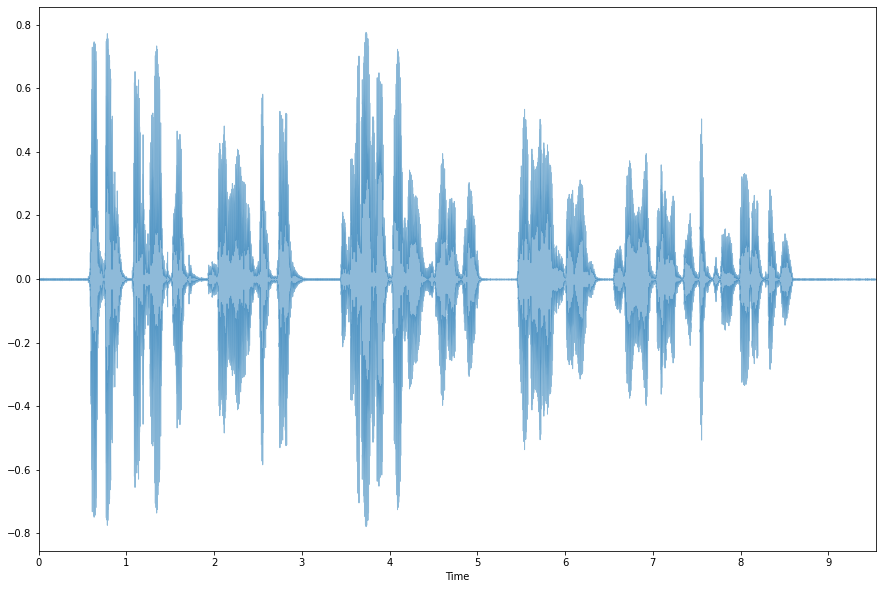

In [7]:
sig.plot_signal()

In [8]:
normalized_signal = sig.z_score_normalization()

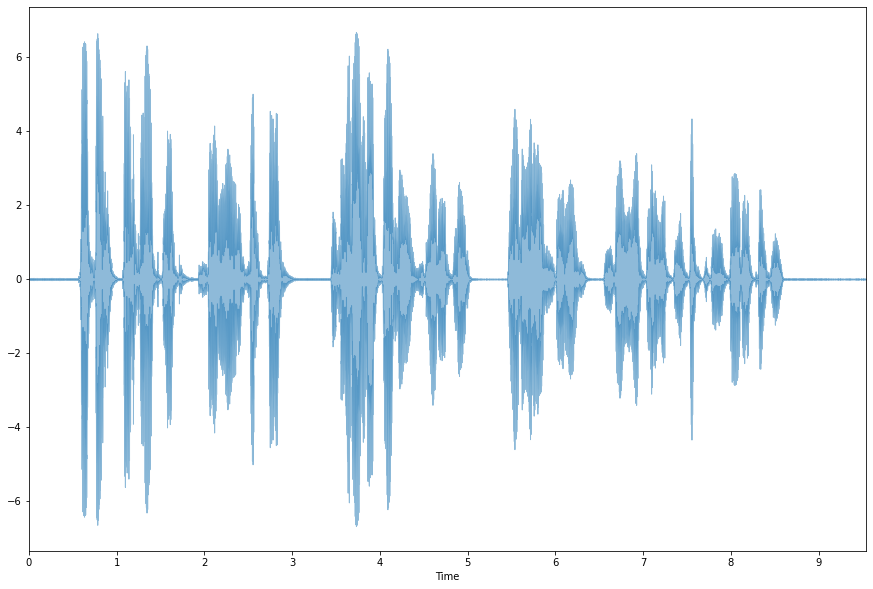

In [9]:
sig.plot_signal()

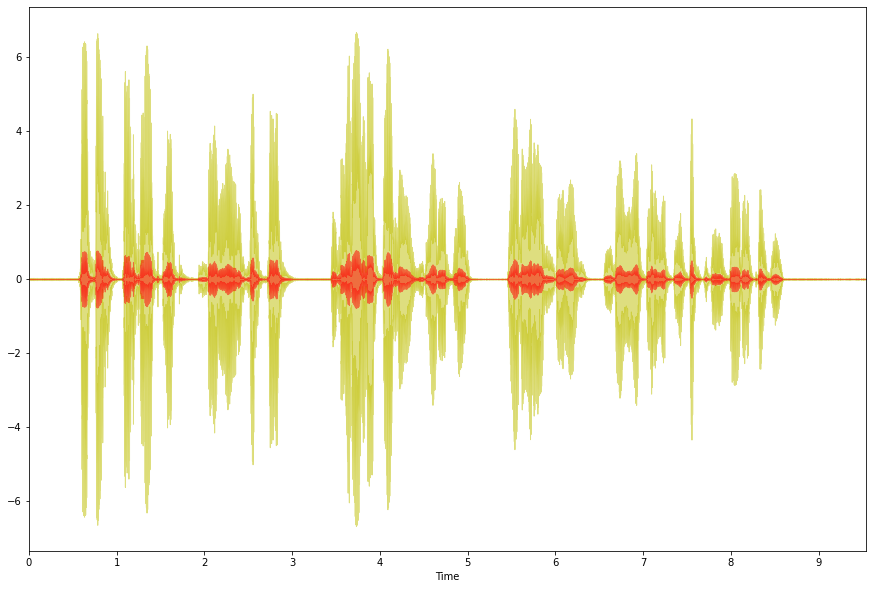

In [10]:
plt.figure(figsize=(15,10))
librosa.display.waveplot(normalized_signal, alpha=0.5, color='y')
librosa.display.waveplot(signal, alpha=0.5, color='r')
plt.show()

In [11]:
ipd.Audio(sig.get_path())

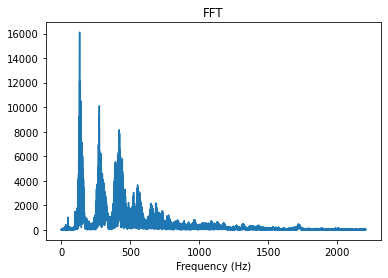

In [12]:
sig.calculate_fft()
sig.display_fft(f_ratio=0.1)

## Similarly for STFT of a signal

In [13]:
stft_obj = stft()

In [14]:
stft_value = stft_obj.calculate_stft(signal)

In [15]:
spec_value = stft_obj.calculate_spectrogram()

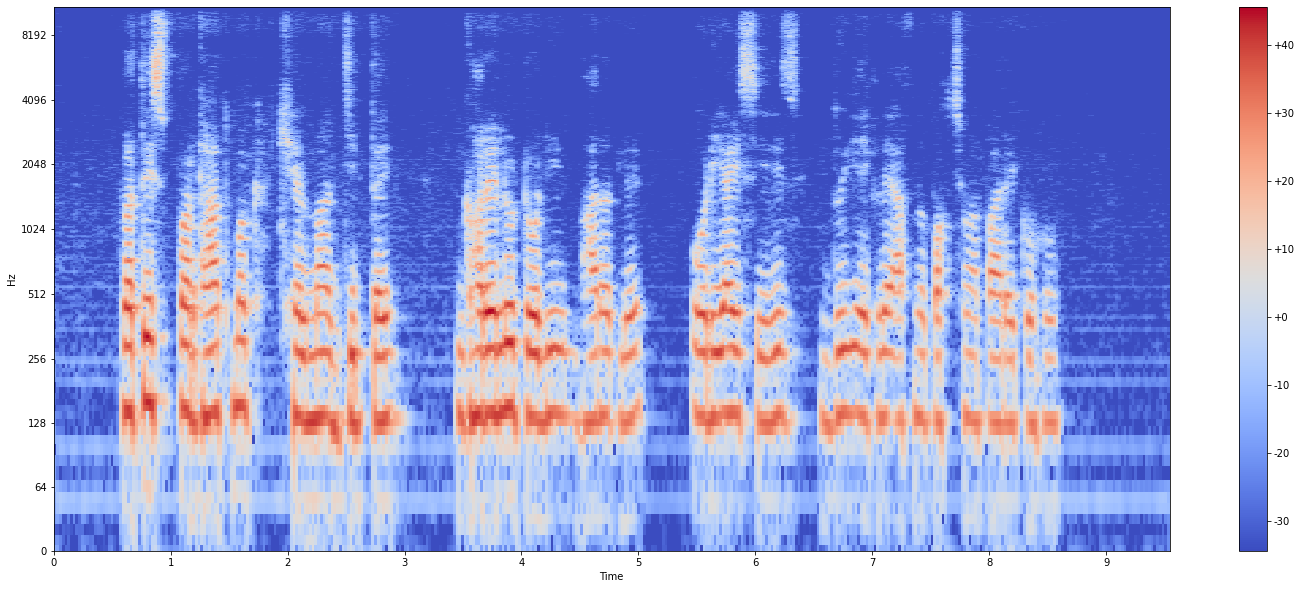

In [16]:
stft_obj.display_spectrogram(sr=sr, y_axis='log')

## For MFCC

In [17]:
calculate_mfcc_obj = mfcc()

In [18]:
mfcc_calc = calculate_mfcc_obj.calculate_mfcc(y = signal, sr=sr)

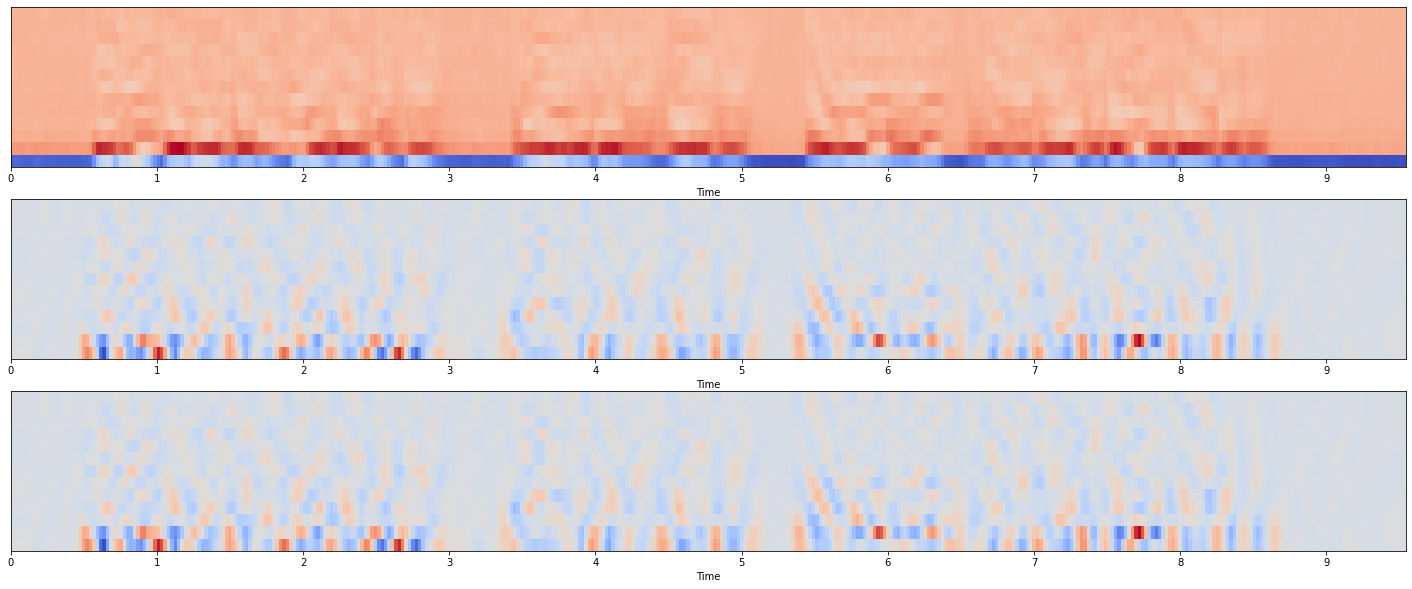

In [19]:
calculate_mfcc_obj.plot_mfcc(mfcc=mfcc_calc, sr=sr)

In [20]:
calculate_mfcc_obj.calculate_all_mfcc(y=normalized_signal, save_to_file=True, unique_id=df["fileName"][100])

array([[-2.74248657e+02, -2.66229614e+02, -2.66794159e+02, ...,
        -3.03746399e+02, -3.03713318e+02, -3.09233887e+02],
       [ 5.79080429e+01,  6.11478577e+01,  6.13255043e+01, ...,
         3.62242661e+01,  3.70278244e+01,  3.13301620e+01],
       [ 1.72019100e+01,  1.62690315e+01,  1.48634157e+01, ...,
         2.32070465e+01,  2.52441635e+01,  2.42451344e+01],
       ...,
       [ 1.21584624e-01,  1.21584624e-01,  1.21584624e-01, ...,
        -2.86842026e-02, -2.86842026e-02, -2.86842026e-02],
       [ 1.02531888e-01,  1.02531888e-01,  1.02531888e-01, ...,
        -1.64705247e-01, -1.64705247e-01, -1.64705247e-01],
       [-9.95293632e-02, -9.95293632e-02, -9.95293632e-02, ...,
        -1.22523583e-01, -1.22523583e-01, -1.22523583e-01]], dtype=float32)

In [21]:
calculate_mfcc_obj.read_h5_file(df["fileName"][100])

array([[-2.74248657e+02, -2.66229614e+02, -2.66794159e+02, ...,
        -3.03746399e+02, -3.03713318e+02, -3.09233887e+02],
       [ 5.79080429e+01,  6.11478577e+01,  6.13255043e+01, ...,
         3.62242661e+01,  3.70278244e+01,  3.13301620e+01],
       [ 1.72019100e+01,  1.62690315e+01,  1.48634157e+01, ...,
         2.32070465e+01,  2.52441635e+01,  2.42451344e+01],
       ...,
       [ 1.21584624e-01,  1.21584624e-01,  1.21584624e-01, ...,
        -2.86842026e-02, -2.86842026e-02, -2.86842026e-02],
       [ 1.02531888e-01,  1.02531888e-01,  1.02531888e-01, ...,
        -1.64705247e-01, -1.64705247e-01, -1.64705247e-01],
       [-9.95293632e-02, -9.95293632e-02, -9.95293632e-02, ...,
        -1.22523583e-01, -1.22523583e-01, -1.22523583e-01]], dtype=float32)